In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


0.1 0.9666666666666667
(array([ 4,  5,  6,  7,  8, 15, 17, 20, 21, 22, 23, 29, 31, 37, 41]), array([47, 45, 42, 40, 38, 24, 21, 17, 16, 15, 14, 10,  9,  7,  6]))
[ 0.00442901 -0.00671202  0.00884354  0.00010204 -0.00741139  0.00017007
 -0.00272109  0.00504202  0.0002551   0.00027211  0.00612245  0.00040816
  0.00725624 -0.00816327  0.00068027]


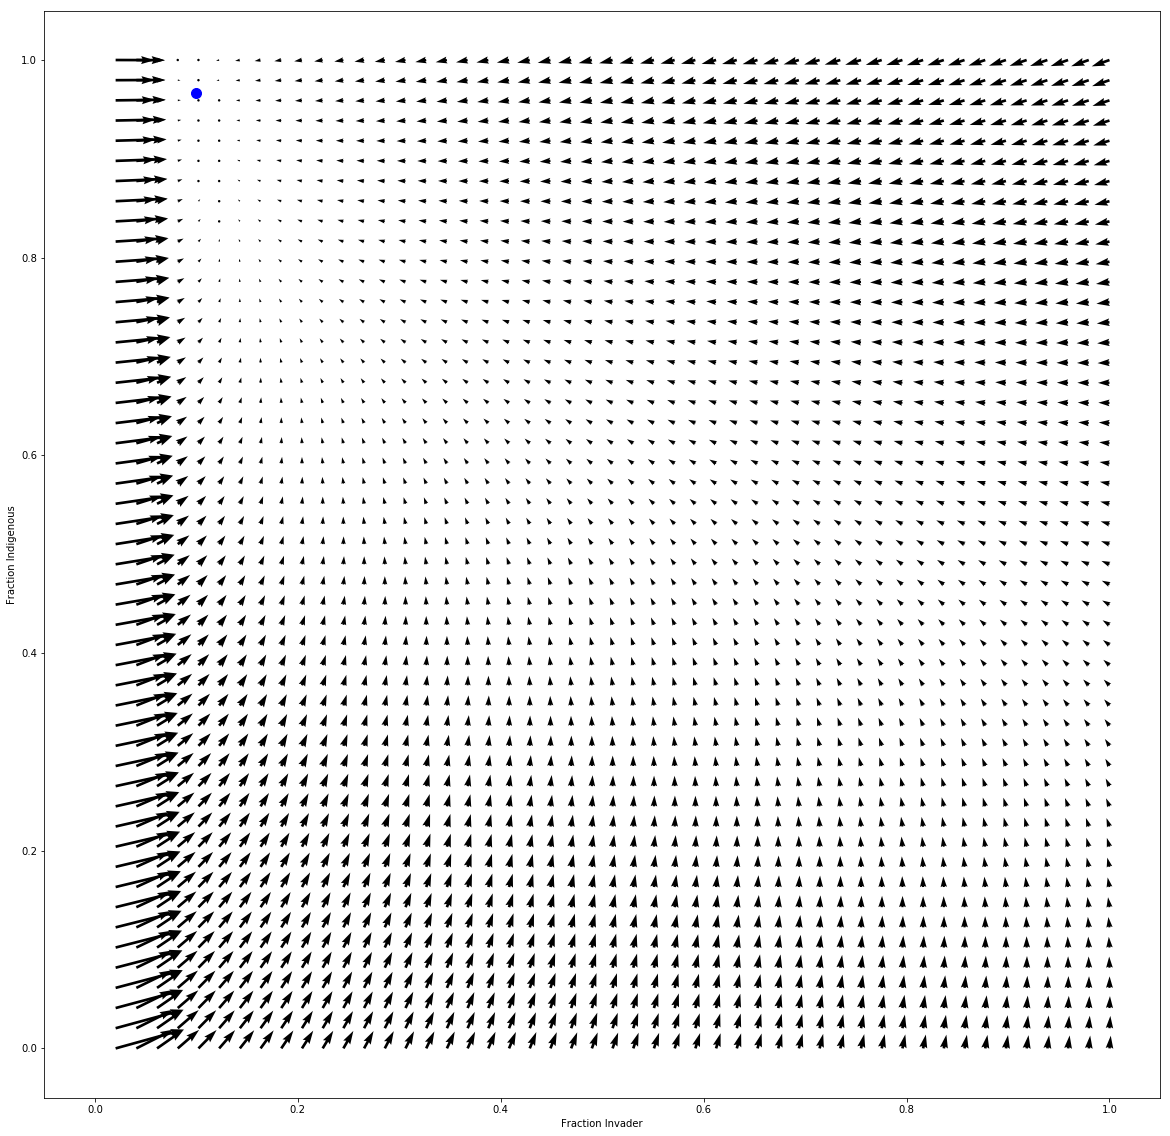

In [2]:
#set variables 
a=1
b=3
m=0.2

x0=0.5
y0=0.5

Xspan = np.linspace(0,1)
Yspan = np.linspace(0,1)
x, y = np.meshgrid(Xspan, Yspan)

fig,ax=plt.subplots(1,1,figsize=(20,20))



dx = np.zeros(np.shape(x))
dy = np.zeros(np.shape(y))


# Fill velocities into grid.
for l in range(x.shape[0]):
    for n in range(y.shape[0]):
        dx[l,n]=a*(1-(x[l,n]+(b/a)*y[l,n]))+m/(x[l,n])
        dy[l,n] = b*(1-(y[l,n]+(a/b)*x[l,n]))



q = ax.quiver(x , y , dx, dy)
x_set=m/(b-a)
y_set=(b**2-b*a-a*m)/(b**2-b*a)

print(x_set,y_set)
ax.plot(x_set,y_set,marker='o',markersize=10,color='b')
# Flow diagram
ax.quiverkey(q, X=0.3, Y=1.1, U=1,label='Quiver key, length = 1/time', labelpos='E')
ax.set_xlabel("Fraction Invader")
ax.set_ylabel("Fraction Indigenous")
subset=np.where((dx>=-0.01) & (dx<=0.01))
y_subset=np.where((dy>=-0.01) & (dy<=0.01))
print(subset)
print(dx[subset])

In [16]:
def f(x, y):
    return np.sqrt(x**2+y**2)

In [17]:
Z = 1/f(dx, dy)

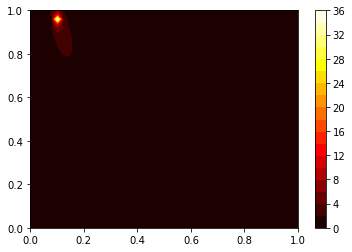

In [18]:
plt.contourf(x, y, Z, 20, cmap='hot')
plt.colorbar()

In [52]:
a=1
b=2 
for m in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    